In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [2]:
data_dir = 'C:\\Users\\GCBA\\Desktop\\Udemy\\Udemy 5 - TF Keras\\04-CNNs\\cell_images'

In [3]:
os.listdir(path=data_dir)

['test', 'train']

In [4]:
train_path = data_dir + '\\train\\'
test_path = data_dir + '\\test\\'

In [5]:
os.listdir(path=train_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(path=test_path)

['parasitized', 'uninfected']

In [7]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [8]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

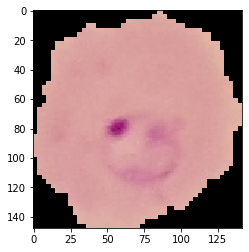

In [9]:
plt.imshow(imread(para_cell))

In [10]:
un_cell = train_path+'\\uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

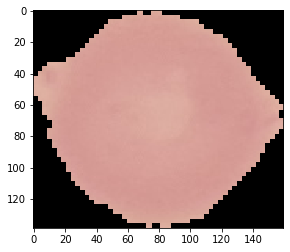

In [11]:
plt.imshow(imread(un_cell))

In [12]:
len(os.listdir(path=train_path+'parasitized'))

12480

In [13]:
len(os.listdir(path=train_path+'uninfected'))

12480

In [14]:
len(os.listdir(path=test_path+'parasitized'))

1300

In [15]:
len(os.listdir(path=test_path+'uninfected'))

1300

In [106]:
#help(ImageDataGenerator)

In [26]:
dim1 = []
dim2 = []

for imname in os.listdir(path=train_path+'parasitized'):
    
    dim1_, dim2_, colour = imread(train_path+'parasitized\\'+imname).shape
                                  
    dim1.append(dim1_)
                                  
    dim2.append(dim2_)

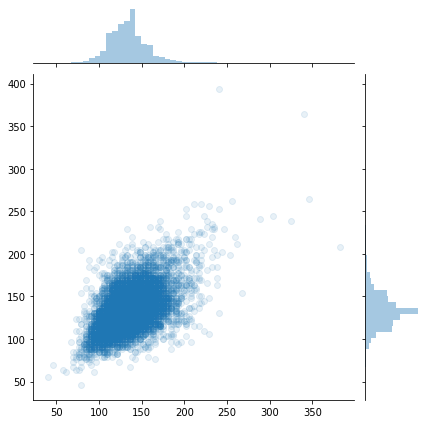

In [33]:
sns.jointplot(x=dim1, y=dim2, alpha=0.1);

In [30]:
np.mean(dim1), np.mean(dim2) 

(134.360205144643, 133.66447632021797)

In [31]:
im_shape = (130,130,3)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
image_gen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [40]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [42]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout

In [52]:
im_shape

(130, 130, 3)

In [54]:
#Make NN

model = Sequential()

#Input layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=im_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


#Hidden layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


#Hidden layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


#flatten
model.add(Flatten())


#dense
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


#Output layer
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [59]:
batch_size = 16

In [61]:
train_image_gen = image_gen.flow_from_directory(
    directory=train_path, # ESTO DEBE SER TRAIN PATH
    target_size=im_shape[:2], # SOLO IMPORTA ANCHO Y ALTO, NO LA DIMENSION DE COLORES
    color_mode='rgb', # ES RGB, IGUAL POR DEFAULT ES ASI
    class_mode='binary', #ES UN PROBLEMA DE CLASIFICACION BINARIA
    batch_size=batch_size, #BATCHES MAS CHICOS IMPLICAN MAYOR TIEMPO, PERO FUNCIONAN EN COMPUS CHOTAS
    shuffle = True)

Found 24958 images belonging to 2 classes.


In [62]:
test_image_gen = image_gen.flow_from_directory(
    directory=test_path, # ESTO DEBE SER TEST PATH
    target_size=im_shape[:2],
    color_mode='rgb',
    class_mode='binary',
    batch_size=batch_size,
    shuffle = False) # ESTO DEBE SER FALSO POR SER EL TEST SET

Found 2600 images belonging to 2 classes.


In [63]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [64]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [66]:
#results = model.fit_generator(train_image_gen,epochs=15,verbose=3,callbacks=[early_stop],validation_data=test_image_gen)

In [88]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

In [ ]:
model = load_model('malaria_detector.h5')

# Evaluo las perdidas del modelo para ver si hay overfitting

In [89]:
losses = pd.DataFrame(model.history.history)

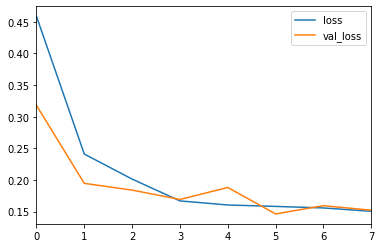

In [90]:
losses[['loss','val_loss']].plot()

In [91]:
model.metrics_names

['loss', 'accuracy']

In [114]:
model.evaluate_generator(test_image_gen)

[0.14881458843521134, 0.94884616]

In [97]:
from tensorflow.keras.preprocessing import image

In [115]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [116]:
pred_probabilities

array([[2.2703409e-04],
       [2.1749735e-04],
       [5.4228306e-04],
       ...,
       [9.7448182e-01],
       [9.7615612e-01],
       [9.6059412e-01]], dtype=float32)

In [117]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [118]:
predictions = pred_probabilities > 0.5
#Aca el 0.5 podria cambiarse y de hecho es el punto mas importante del problema. Modificarlo puede traer mas falsos positivos
#Pero tambien, Y ESTE ES EL PUNTO, reducir el RECALL, o sea evitar muertes por falsos negativos.

In [119]:
# Numpy lo traduce a True or False.
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

In [121]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [122]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1220,   80],
       [  46, 1254]], dtype=int64)

# Prediccion sobre imagen que el modelo nunca vio

In [132]:
my_image = image.load_img(para_cell,target_size=image_shape)

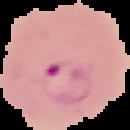

In [137]:
my_image

In [138]:
type(my_image)

PIL.Image.Image

In [139]:
my_image = image.img_to_array(my_image)

In [142]:
type(my_image)

numpy.ndarray

In [143]:
my_image.shape

(130, 130, 3)

In [144]:
my_image = np.expand_dims(my_image, axis=0)

In [145]:
my_image.shape

(1, 130, 130, 3)

In [146]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [147]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [148]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}